# Notebook to test codes

In [8]:
import numpy as np
import pandas as pd
import scipy
import math

In [52]:
def distance_mat(A, B, squared=False):
    """
    Compute all pairwise distances between vectors in A and B.

    Parameters
    ----------
    A : np.array
        shape should be (M, K)
    B : np.array
        shape should be (N, K)

    Returns
    -------
    D : np.array
        A matrix D of shape (M, N).  Each entry in D i,j represnets the
        distance between row i in A and row j in B.
    """
    M = A.shape[0]
    N = B.shape[0]

    assert A.shape[1] == B.shape[1], f"The number of components for vectors in A \
        {A.shape[1]} does not match that of B {B.shape[1]}!"

    A_dots = (A*A).sum(axis=1).reshape((M,1))*np.ones(shape=(1,N))
    B_dots = (B*B).sum(axis=1)*np.ones(shape=(M,1))
    D_squared =  A_dots + B_dots -2*A.dot(B.T)

    if squared == False:
        zero_mask = np.less(D_squared, 0.0)
        D_squared[zero_mask] = 0.0
        return np.sqrt(D_squared)

    return D_squared

from scipy.spatial import distance_matrix

In [44]:

def twoMoon(numObjects = 180, shape1a = -0.4, shape2b = 1, shape1rFrom = 0.8, shape1rTo = 1.2, shape2rFrom = 0.8, shape2rTo = 1.2):
    """
    Generating twoMoon data

    Parameters
    ----------
    
    Returns
    -------
    """
    nrow = numObjects*2
    x =  np.array([[0.0 for col in range(2) ] for row in range(nrow)])
    for i in range(nrow):
        alpha = np.random.uniform(low=0.0, high=2*math.pi) 
        if i >= numObjects:
            r = np.random.uniform(shape2rFrom, shape2rTo)
        else:
            r = np.random.uniform(shape1rFrom, shape1rTo)
        tmp1 = r * math.cos(alpha)
        tmp2 = r * math.sin(alpha)
        if i < numObjects:
            x[i, 0] = shape1a + abs(tmp1)
            x[i, 1] = tmp2
        else:
            x[i, 0] = -abs(tmp1)
            x[i, 1] = tmp2 - shape2b
    
    label = np.array([[0 for row in range(numObjects)], [1 for row in range(numObjects)]])
    return {"data": x, "cluster" :label}


In [104]:
data = twoMoon()
X = data["data"]
Y = data["cluster"]

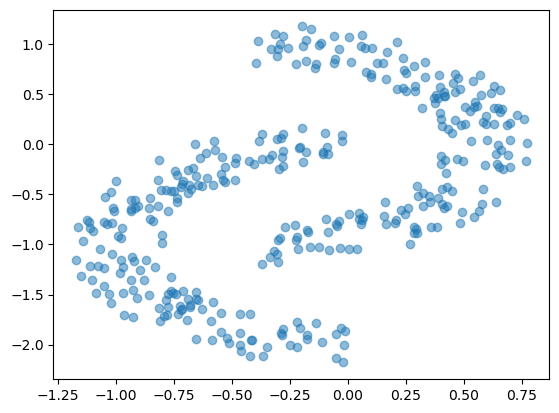

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

In [54]:
distance_mat(X,X)

array([[1.05367121e-08, 5.65765187e-01, 4.25978437e-01, ...,
        9.60773005e-01, 2.51320621e+00, 2.19435531e+00],
       [5.65765187e-01, 0.00000000e+00, 1.52981817e-01, ...,
        1.20797848e+00, 2.91234227e+00, 2.55443631e+00],
       [4.25978437e-01, 1.52981817e-01, 0.00000000e+00, ...,
        1.07913699e+00, 2.76950697e+00, 2.41639875e+00],
       ...,
       [9.60773005e-01, 1.20797848e+00, 1.07913699e+00, ...,
        0.00000000e+00, 1.73652869e+00, 1.35825466e+00],
       [2.51320621e+00, 2.91234227e+00, 2.76950697e+00, ...,
        1.73652869e+00, 0.00000000e+00, 4.13400359e-01],
       [2.19435531e+00, 2.55443631e+00, 2.41639875e+00, ...,
        1.35825466e+00, 4.13400359e-01, 0.00000000e+00]])

In [56]:
dist = distance_matrix(X,X)
dist.shape

(360, 360)

In [82]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import collections


In [109]:
centers = None
print(centers is None)

True


In [112]:
def constructKnots(X, centers = None, labels = None, k = None, rep = 100):

  n, d = X.shape
  #construct knots
  if centers is None and labels is None:
    # Overfitting k-means
    #setting the number of knots k
    if k is None:
      k = round(math.sqrt(n))

    km = KMeans(n_clusters = k, n_init = rep)
    km.fit(X)
    centers = km.cluster_centers_
    labels = km.labels_

  elif labels is None:#centers provided but not labels
    nbrs = NearestNeighbors(n_neighbors=1).fit(centers)
    labels = nbrs.kneighbors(X, return_distance=False)
    k = len(centers)
    
  elif centers is None:#labels provided but not centers
    elements_count = collections.Counter(labels)
    k = len(elements_count.items())
    centers = np.array([[0.0 for col in range(d)] for row in range(k)])
    for key, value in elements_count.items():
      centers[key,] = np.mean(X[labels == key,], axis=0)

  else:
    k = len(centers)
  

  withinss = np.array([0.0]*k)
  for i in range(k):
    withinss[i] = np.sum((X[labels == i,]-centers[i,])**2)

  return {"centers":centers, "cluster":labels, "nknots":k, "withinss": withinss}

In [113]:
conKnots = constructKnots(X)

In [117]:
knots = conKnots["centers"]
labels = conKnots["cluster"]
k = conKnots["nknots"]
withinss = conKnots["withinss"]